# 🏠 House Data Exploration
This notebook performs initial data exploration on the `house_data.csv` dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/house_data.csv')

# ℹ️ Display basic information about the dataset
print(f"📐 Dataset shape (rows, columns): {df.shape}")
print("\n📊 Dataset Info:")
print(df.info())


📐 Dataset shape (rows, columns): (84, 7)

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None


In [3]:
# ❓ Checking for missing values to identify data quality issues
print("\n🔍 Missing values per column:")
print(df.isna().sum())
print(df.isnull().sum())


🔍 Missing values per column:
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64


In [4]:
# 📈 Descriptive statistics like mean, std deviation, min, max, etc.
print("\n📋 Statistical Summary:")
print(df.describe())



📋 Statistical Summary:
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000


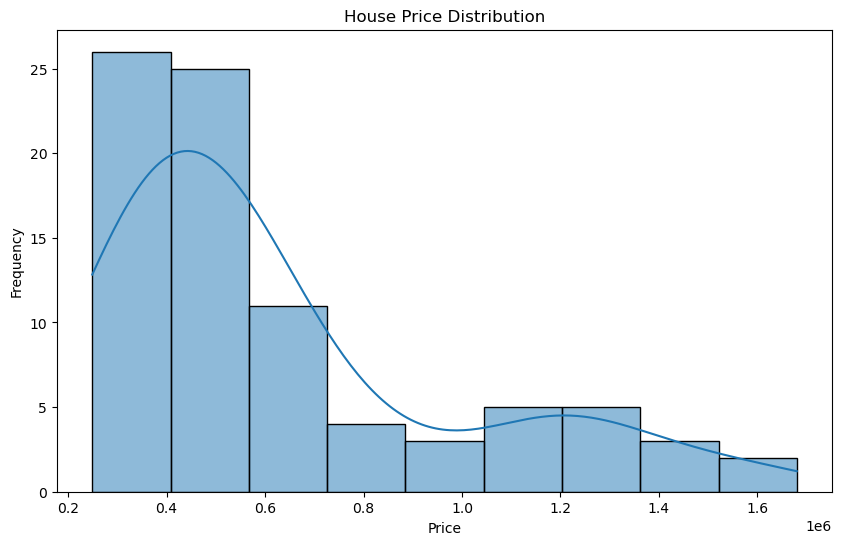

📊 Plotted house price distribution.


In [5]:
# 💰 Visualizing the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print("📊 Plotted house price distribution.")

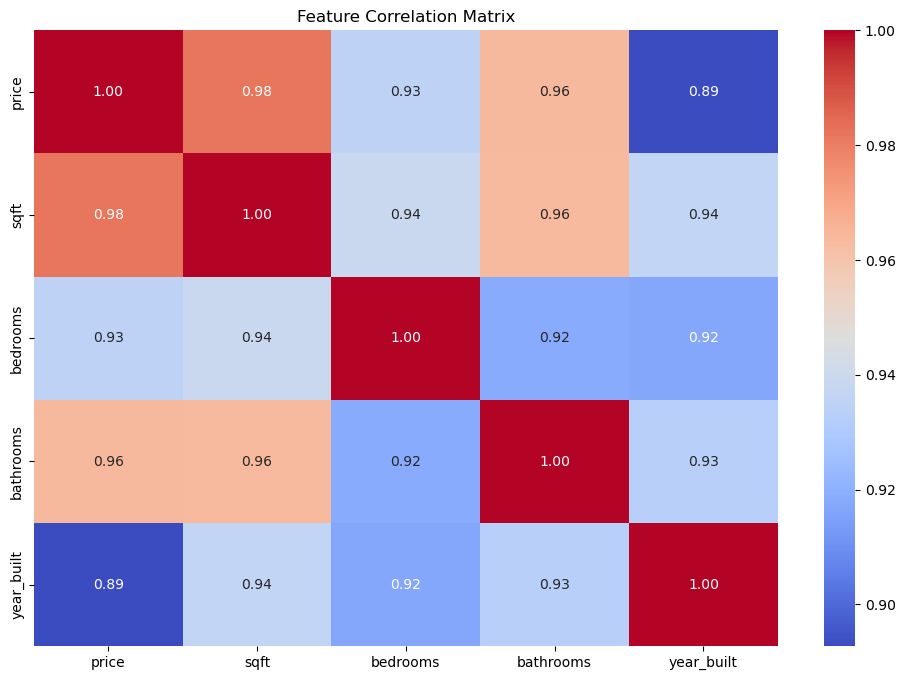

📈 Displayed feature correlation heatmap.


In [6]:
# 🔗 Checking how features are correlated with each other
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include="number").corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

print("📈 Displayed feature correlation heatmap.")


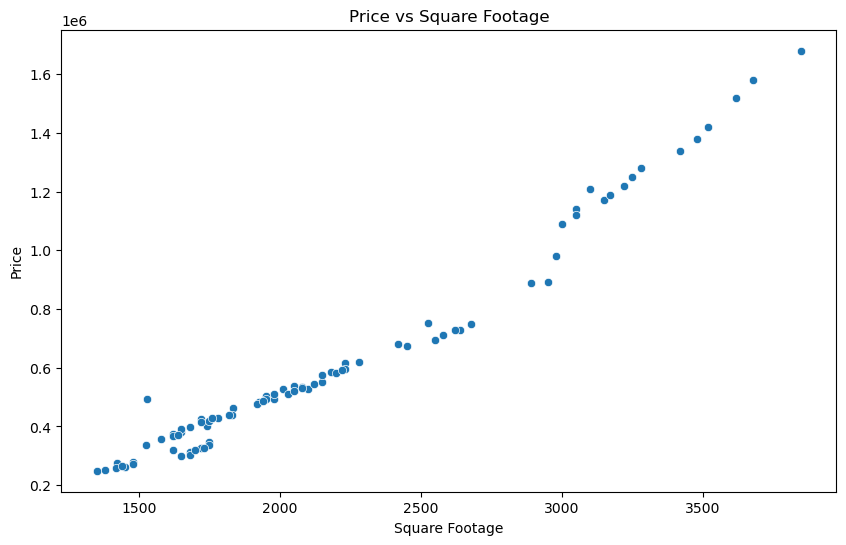

📐 Analyzed relation between square footage and price.


In [7]:
# 📏 Scatter plot to observe relationship between sqft and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y='price', data=df)
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

print("📐 Analyzed relation between square footage and price.")


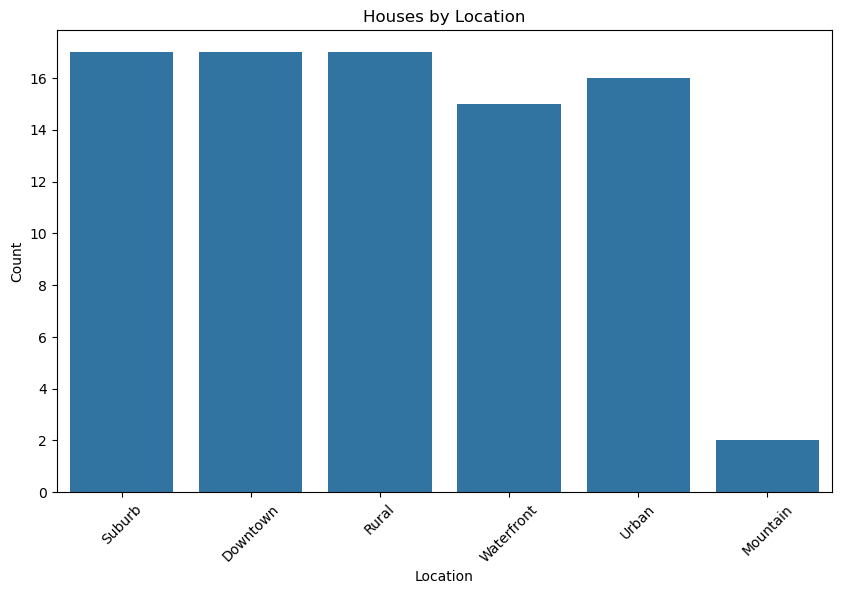

📍 Visualized distribution of houses by location.


In [8]:
# 📍 Bar chart to see how many houses exist in each location
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=df)
plt.title('Houses by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("📍 Visualized distribution of houses by location.")


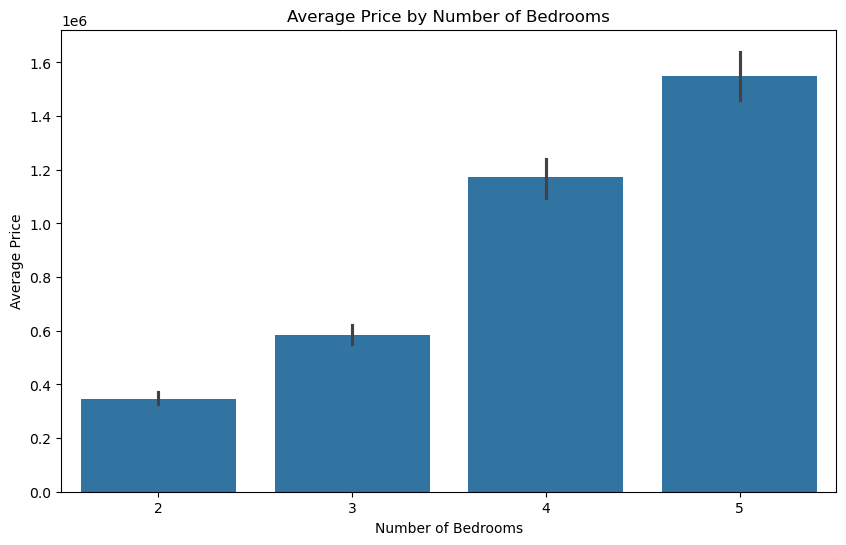

🛏️ Compared average prices based on bedroom count.


In [9]:
# 🛏️ Bar chart showing how average house price varies by bedroom count
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=df)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

print("🛏️ Compared average prices based on bedroom count.")


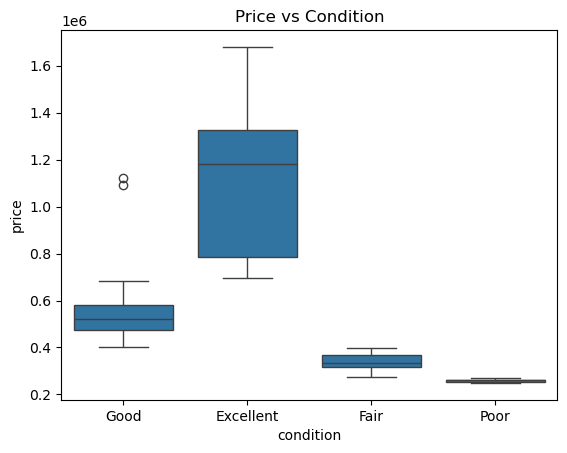

In [10]:
# Next Step 
# Feature Engineering
# Create new features or modify existing ones
sns.boxplot(x='condition', y='price', data=df)
plt.title("Price vs Condition")
plt.show()

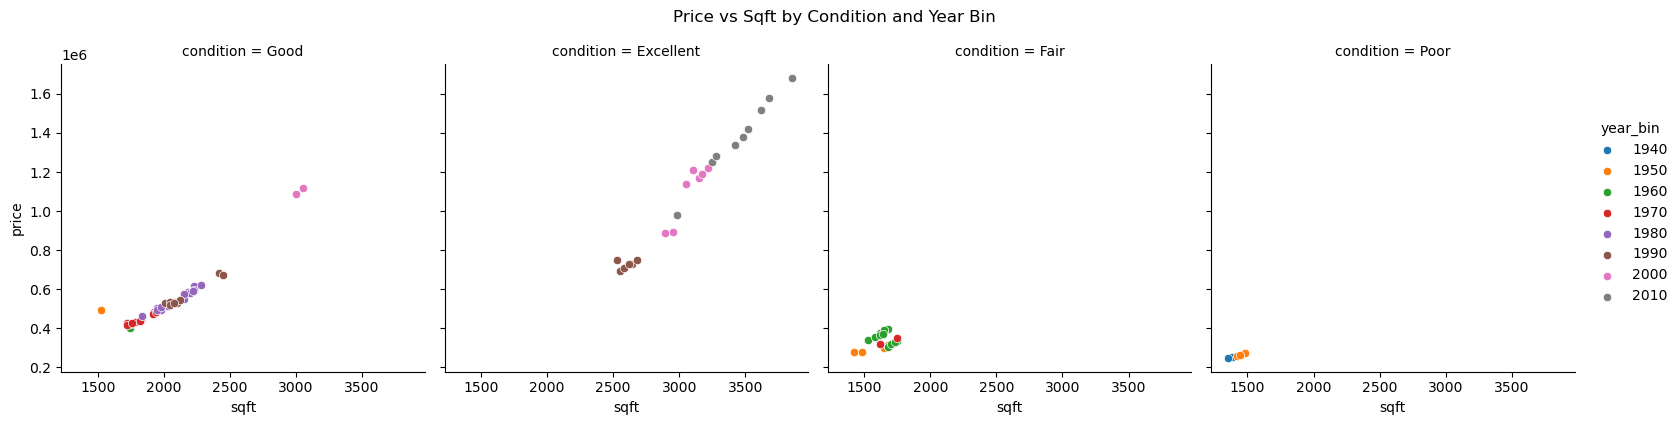

In [11]:
df['year_bin'] = (df['year_built'] // 10) * 10

g = sns.FacetGrid(df, col='condition', hue='year_bin', height=4)
g.map_dataframe(sns.scatterplot, x='sqft', y='price')
g.add_legend()
g.figure.suptitle('Price vs Sqft by Condition and Year Bin', y=1.05)
plt.show()
